In [62]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

permittivity_real = np.random.uniform(0.01, 0.5, 1000)
permittivity_imaginary = np.random.uniform(0.01, 0.5, 1000)
data = {
    'Frequency': np.linspace(1.0, 2.0, 1000),
    'Real': np.random.uniform(0.01, 0.5, 1000),
    'Imaginary': np.random.uniform(0.01, 0.5, 1000)
}
df = pd.DataFrame(data)
print(f"Output: {permittivity_real}")
print(f"Output: {permittivity_imaginary}")
print(f"Dataframe: ")
print(df)

Output: [0.2857316  0.27329447 0.07029787 0.39029092 0.10224056 0.31870879
 0.40387225 0.01026089 0.27543674 0.46320917 0.05544422 0.07561234
 0.2286028  0.37915863 0.05694786 0.14948858 0.30397395 0.46843971
 0.43306155 0.47940404 0.04205907 0.36490179 0.04229338 0.29241889
 0.40531839 0.23543094 0.39189217 0.10552672 0.08272752 0.38246267
 0.33710463 0.31554035 0.20201592 0.23384201 0.46697174 0.03774669
 0.15398493 0.49571319 0.27068766 0.37431118 0.19454969 0.03960962
 0.33833725 0.15945816 0.2491025  0.10288673 0.20715195 0.09215982
 0.23638386 0.46309971 0.32530762 0.4417253  0.14151448 0.14893952
 0.12746058 0.30138651 0.33144407 0.0569647  0.33749992 0.09421354
 0.10192611 0.13570252 0.07012195 0.44193216 0.42908152 0.16460869
 0.23834517 0.43843436 0.11980886 0.4921766  0.07647691 0.19642467
 0.47064735 0.47079309 0.12729088 0.22057782 0.13075162 0.28753718
 0.44643819 0.40859164 0.15326999 0.4222689  0.33920122 0.01554909
 0.06555526 0.43298312 0.02925631 0.44562564 0.0865903

In [63]:
X = df.values
y = np.array([permittivity_real, permittivity_imaginary]).T

In [64]:
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]
split_point = int(0.8 * len(X))
X_train = X[:split_point]
y_train = y[:split_point]
X_val = X[split_point:]
y_val = y[split_point:]

In [65]:
X_train.shape

(800, 3)

In [66]:
y_train.shape

(800, 2)

In [67]:
X_val.shape

(200, 3)

In [68]:
y_val.shape

(200, 2)

In [69]:
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(y.shape[1])
])
model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.MeanSquaredError())

In [70]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                64        
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dense_17 (Dense)            (None, 2)                 34        
                                                                 
Total params: 370 (1.45 KB)
Trainable params: 370 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.MeanSquaredError(), metrics=['accuracy'])

Epoch 1/20


800/800 [==============================] - 0s 397us/step - loss: 0.0319 - accuracy: 0.4762 - val_loss: 0.0218 - val_accuracy: 0.5050
Epoch 2/20
800/800 [==============================] - 0s 390us/step - loss: 0.0218 - accuracy: 0.4875 - val_loss: 0.0210 - val_accuracy: 0.5250
Epoch 3/20
800/800 [==============================] - 0s 330us/step - loss: 0.0216 - accuracy: 0.4888 - val_loss: 0.0214 - val_accuracy: 0.4900
Epoch 4/20
800/800 [==============================] - 0s 326us/step - loss: 0.0212 - accuracy: 0.5300 - val_loss: 0.0211 - val_accuracy: 0.4750
Epoch 5/20
800/800 [==============================] - 0s 333us/step - loss: 0.0210 - accuracy: 0.5063 - val_loss: 0.0215 - val_accuracy: 0.4750
Epoch 6/20
800/800 [==============================] - 0s 322us/step - loss: 0.0212 - accuracy: 0.4737 - val_loss: 0.0229 - val_accuracy: 0.5050
Epoch 7/20
800/800 [==============================] - 0s 331us/step - loss: 0.0212 - accuracy: 0.4737 - val_loss: 0.0204 - val_accuracy: 0.4750
Epo

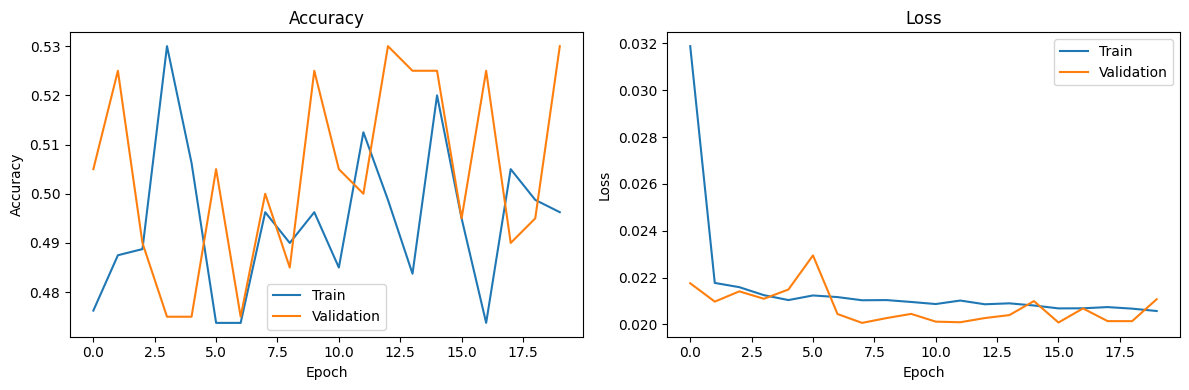

In [72]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=1)

# Plot the accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()
